# NoSQL Project: K-Pop Sales analysis using RavenDB
### Ulysse BOUCHET

### DB Connection

##### Imports

In [139]:
# Imports
from pyravendb.store import document_store
from pyravendb.data.query import OrderingType
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

##### KpopSale class representation

In [140]:
# Represents a kpop sale
class KpopSale(object):
    def __init__(self, artist, title, date, country, sales, peak_chart):
        self.artist = artist
        self.title = title
        self.date = date
        self.country = country
        self.sales = sales
        self.peak_chart = peak_chart

##### Initialize connection to DB

In [141]:
# Get access to the database
store = document_store.DocumentStore(urls=["http://localhost:8080"], database="Kpop")
store.initialize()

### Queries & Analytics

##### Top 5 4th Gen K-Pop album sales

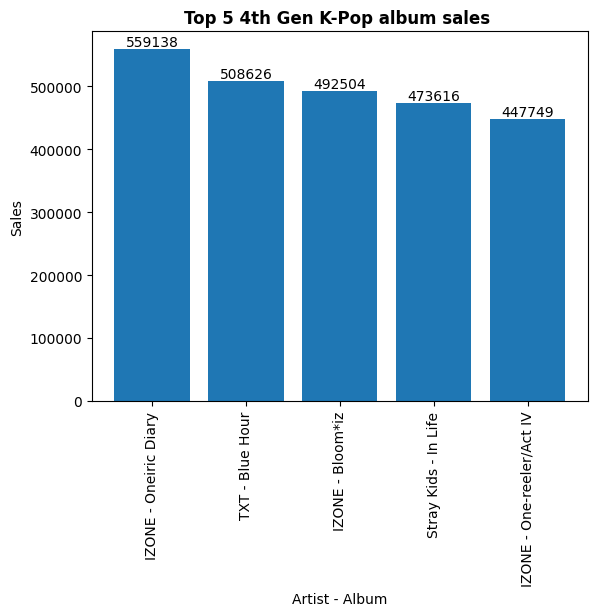

In [161]:
# Open a connexion to the database
with store.open_session() as session:
    # Query the database
    results = list(
        session.query(object_type=KpopSale)
        .order_by_descending("sales", OrderingType.long)
        .take(5)
    )

    # Parse results
    artists_and_titles = []
    sales = []
    for res in results:
        artists_and_titles.append(res.artist + " - " + res.title)
        sales.append(res.sales)

    # Plot bar chart
    bars = plt.bar(artists_and_titles, sales)
    plt.title("Top 5 4th Gen K-Pop album sales ", fontdict={"fontweight": "bold"})
    plt.xlabel("Artist - Album")
    plt.ylabel("Sales")
    plt.xticks(rotation="vertical")
    plt.bar_label(bars)


We can see that IZONE are pretty dominant in sales, having 3 of the 5 best albums.

##### Best artists by total album sales

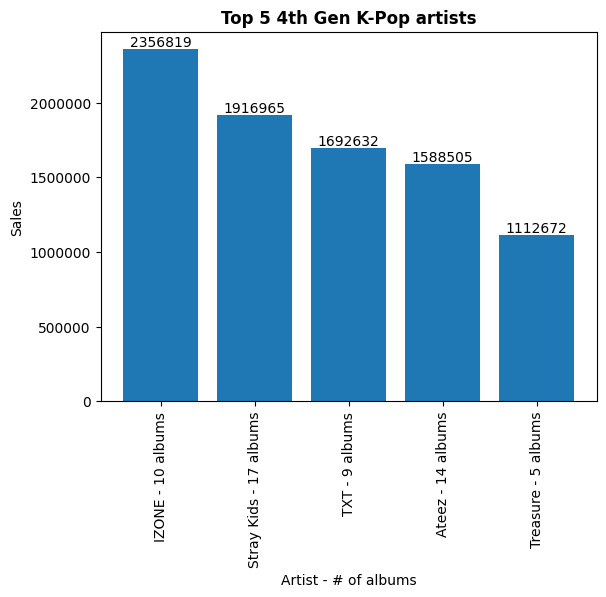

In [159]:
# Open a connexion to the database
with store.open_session() as session:
    # Query the database
    # it is also possible to use the query language syntax directly !
    results = list(
        session.query()
        .raw_query("from KpopSales group by artist order by sum(sales) desc")
        .take(5)
    )

    # Parse results
    artists_and_nb_albums = []
    sales = []
    for res in results:
        artists_and_nb_albums.append(res.artist + " - " + str(res.Count) + " albums")
        sales.append(res.sales)

    # Plot bar chart
    bars = plt.bar(artists_and_nb_albums, sales)
    plt.title("Top 5 4th Gen K-Pop artists", fontdict={"fontweight": "bold"})
    plt.xlabel("Artist - # of albums")
    plt.ylabel("Sales")
    plt.xticks(rotation="vertical")
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d"))
    plt.bar_label(bars, labels=[f"{x.get_height():.0f}" for x in bars])


This confirms that IZONE are dominant : they have the most album sales, pretty far from the 2nd place, despite having almost half Stray Kids' albums.

##### Countries where the most albums were sold

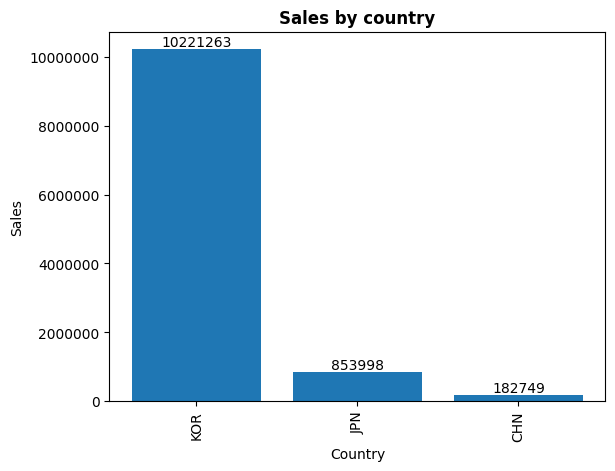

In [158]:
# Open a connexion to the database
with store.open_session() as session:
    # Query the database
    # it is also possible to use the query language syntax directly !
    results = list(
        session.query()
        .raw_query("from KpopSales group by country order by sum(sales) desc")
        .take(5)
    )

    # Parse results
    countries = []
    sales = []
    for res in results:
        countries.append(res.country)
        sales.append(res.sales)

    # Plot bar chart
    bars = plt.bar(countries, sales)
    plt.title("Sales by country", fontdict={"fontweight": "bold"})
    plt.xlabel("Country")
    plt.ylabel("Sales")
    plt.xticks(rotation="vertical")
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d"))
    plt.bar_label(bars, labels=[f"{x.get_height():.0f}" for x in bars])


The K-Pop market is obviously mainly taking place in Korea. 